In [2]:
!pip install calmap

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from pandas_profiling import ProfileReport
%matplotlib inline

In [4]:
df=pd.read_csv("Supermarket Sales.csv")

In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [8]:
#type of date and time is object so we need to change it
df["Date"]=pd.to_datetime(df["Date"])
df["Time"]=pd.to_datetime(df["Time"])

In [9]:
#we can put the date column as index of whole dataset
df.set_index(df["Date"],inplace=True)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2021-07-04 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2021-07-04 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2021-07-04 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2021-07-04 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2021-07-04 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [10]:
#fetch the summary statistics of whole dataset
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


**Univariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


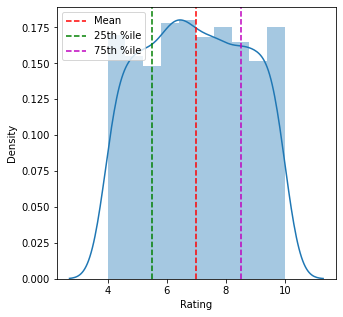

In [11]:
#showing distribution of customer rating
plt.figure(figsize=(5,5))
sns.distplot(df["Rating"])
#get a line representing mean
plt.axvline(x=np.mean(df["Rating"]),color="r",ls="--",label="Mean")
plt.axvline(x=np.percentile(df["Rating"],25),color="g",ls="--",label="25th %ile")
plt.axvline(x=np.percentile(df["Rating"],75),color="m",ls="--",label="75th %ile")
plt.legend(loc="upper left")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e184e73d0>,
      dtype=object)

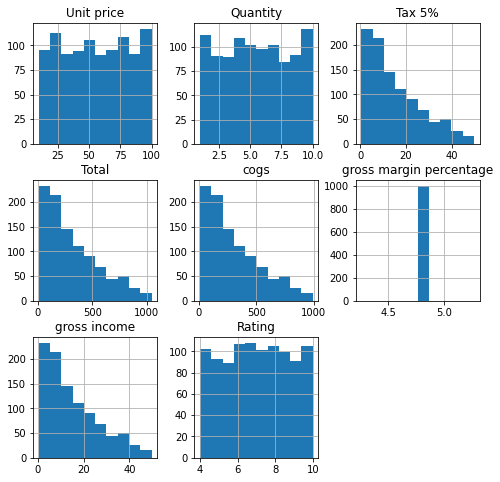

In [12]:
#getting histograms for each possible features
df.hist(figsize=(8,8))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


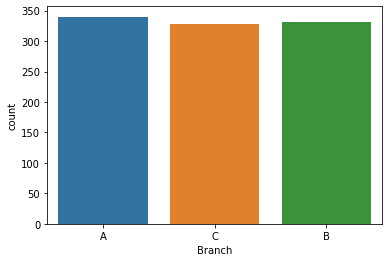

In [13]:
#difference of aggregate sales number between different branches
sns.countplot(df["Branch"])

In [14]:
df["Branch"].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


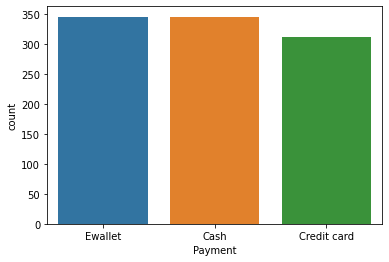

In [15]:
#difference of aggregate sales number between different Payment Methods
sns.countplot(df["Payment"])

In [16]:
df["Payment"].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

**Bivariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


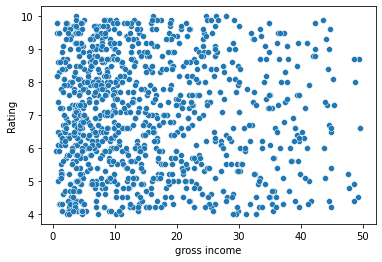

In [17]:
#relationship between gross income and customer rating
sns.scatterplot(df["gross income"],df["Rating"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


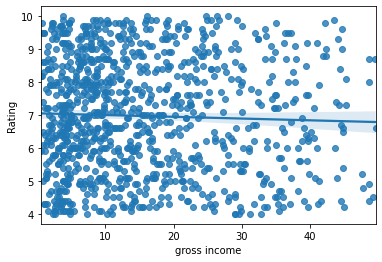

In [18]:
#viewing the trend line in scatter plot is done by Regression Plot
sns.regplot(df["gross income"],df["Rating"])
#the trend line seems to be a flat line which means there is not much relation between both parameters

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


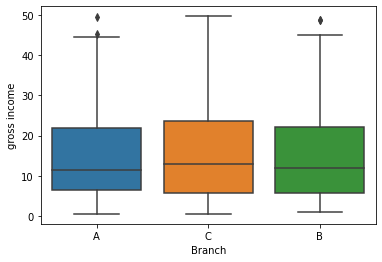

In [19]:
sns.boxplot(df["Branch"],df["gross income"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


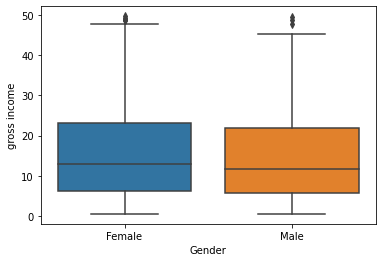

In [20]:
#relationship between gross income and gender
sns.boxplot(df["Gender"],df["gross income"],)

In [21]:
#each date rows are not not unique so we have to take mean of all values in one single date
df_groupby=df.groupby(df.index).mean()
df_groupby.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,
2019-01-01,54.995833,6.750000,18.830083,395.431750,376.601667,4.761905,18.830083,6.583333
2019-01-02,44.635000,6.000000,11.580375,243.187875,231.607500,4.761905,11.580375,6.050000
2019-01-03,59.457500,4.625000,12.369813,259.766062,247.396250,4.761905,12.369813,8.112500
2019-01-04,51.743333,5.333333,12.886417,270.614750,257.728333,4.761905,12.886417,6.516667
2019-01-05,61.636667,4.583333,14.034458,294.723625,280.689167,4.761905,14.034458,7.433333


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


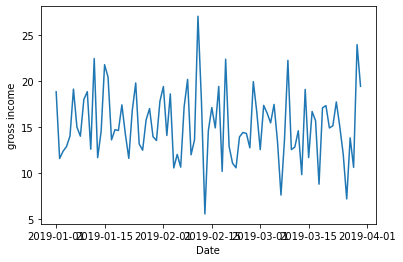

In [22]:
#for analysing line plot we need unique values for each date row so groupby was used
#date time trend in gross income
sns.lineplot(df_groupby.index,df_groupby["gross income"])

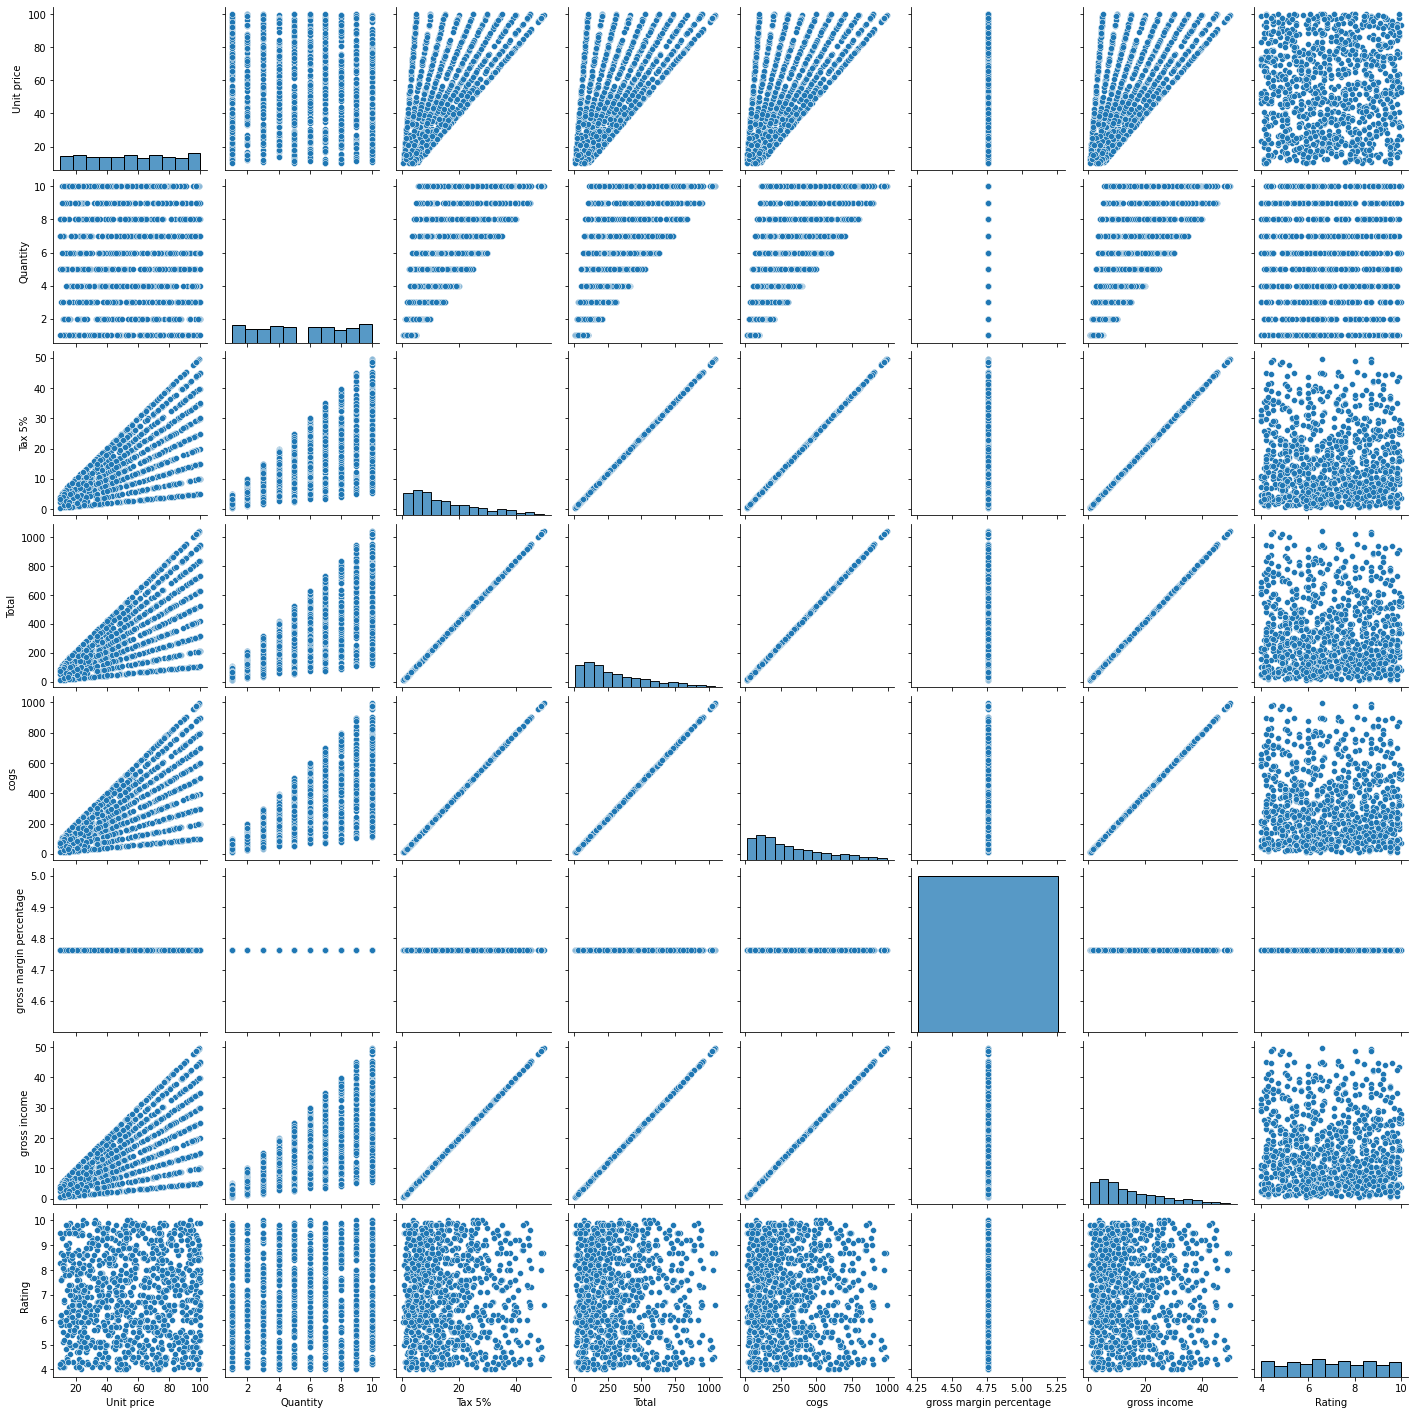

In [23]:
#we can view all the pairwise combinations of the dataset
#but this is time consuming and not recommended for huge datasets
sns.pairplot(df)

**Dealing With Duplicate Elements**


In [24]:
#viewing how many rows are duplicated and which are not
df.duplicated().sum()

0

In [25]:
#viewing the rows that are duplicated 
df[df.duplicated()==True]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,,


In [26]:
#removing all duplicate values
df.drop_duplicates(inplace=True)

**Dealing With Missing Values**

In [27]:
#viewing which rows have missing values and which don't
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [28]:
#filling missing values with value 0
df.fillna(0,inplace=True)

In [29]:
#here filling is only of numerical columns as mean of categorical column is not possible
df.fillna(df.mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


In [30]:
df.mode()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,101-17-6199,A,Yangon,Member,Female,Fashion accessories,83.77,10.0,4.1540,87.2340,2019-02-07,2021-07-04 14:42:00,Ewallet,83.08,4.761905,4.1540,6.0
1,101-81-4070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4640,93.7440,NaT,2021-07-04 19:48:00,NaN,89.28,NaN,4.4640,NaN
2,102-06-2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3770,175.9170,NaT,NaT,NaN,167.54,NaN,8.3770,NaN
3,102-77-2261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0045,189.0945,NaT,NaT,NaN,180.09,NaN,9.0045,NaN
4,105-10-6182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.3260,216.8460,NaT,NaT,NaN,206.52,NaN,10.3260,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,894-41-5205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
996,895-03-6665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
997,895-66-0685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
998,896-34-0956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN


In [31]:
#filling null values of categorical columns can be done using mode
#using 1st row of df.mode()
df.fillna(df.mode().iloc[0],inplace=True)

**Correlation Analysis**

In [33]:
#correlation between 2 individual features
np.corrcoef(df["gross income"],df["Rating"])

array([[ 1.       , -0.0364417],
       [-0.0364417,  1.       ]])

In [37]:
#correlation matrix
corr_matrix=df.corr()
#rounding correlation values of correlation matrix to 2 decimal points
df_round=np.round(corr_matrix,2)
df_round

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,-0.0,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,-0.0,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
gross margin percentage,-0.00,-0.00,0.00,0.00,0.00,1.0,0.00,0.00
gross income,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,0.0,-0.04,1.00


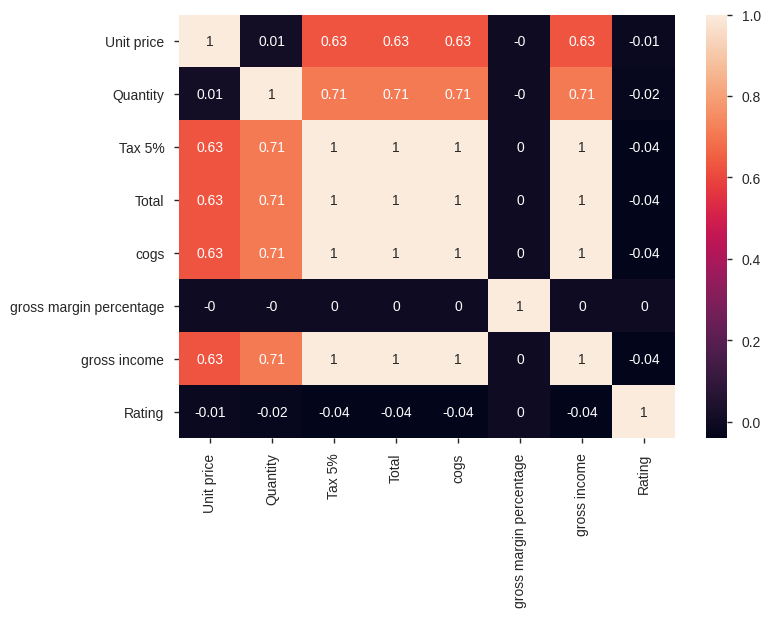

In [42]:
#plotting correlation matrix on heatmap
#annot=>gives us specific correlation values for each small part in heatmap
#colorbar=>reference for variation of colors
hm=sns.heatmap(df_round,annot=True)
hm